<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Autoscout.test177 (1).csv") 

# Data Preparation

In [ ]:
df.head()

,Unnamed: 0,price,km,hp,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,age,Consp_Comb,comfortAir conditioning,comfortAir suspension,comfortArmrest,comfortAutomatic climate control,comfortAuxiliary heating,comfortCruise control,comfortElectric Starter,comfortElectric tailgate,comfortElectrical side mirrors,comfortElectrically adjustable seats,comfortElectrically heated windshield,comfortHeads-up display,comfortHeated steering wheel,comfortHill Holder,comfortKeyless central door lock,comfortLeather seats,comfortLeather steering wheel,comfortLight sensor,comfortLumbar support,comfortMassage seats,comfortMulti-function steering wheel,comfortNavigation system,comfortPanorama roof,comfortPark Distance Control,comfortParking assist system camera,comfortParking assist system self-steering,comfortParking assist system sensors front,comfortParking assist system sensors rear,comfortPower windows,comfortRain sensor,comfortSeat heating,comfortSeat ventilation,comfortSplit rear seats,comfortStart-stop system,comfortSunroof,comfortTinted windows,comfortWind deflector,comfortWindshield,entrBluetooth,...,Body Color_Black,Body Color_Blue,Body Color_Bronze,Body Color_Brown,Body Color_Gold,Body Color_Green,Body Color_Grey,Body Color_Orange,Body Color_Red,Body Color_Silver,Body Color_Violet,Body Color_White,Body Color_Yellow,Paint Type_Metallic,Paint Type_Perl effect,Paint Type_Uni/basic,Gearing Type_Automatic,Gearing Type_Manual,Gearing Type_Semi-automatic,Drive chain_4WD,Drive chain_front,Drive chain_rear,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Emission Class_Euro4,Emission Class_Euro5,Emission Class_Euro6,Emission Label_1(Nosticker),Emission Label_2(Red),Emission Label_3(Yellow),Emission Label_4(Green),Emission Label_5(Blue),Upholstery_Type_Cloth,Upholstery_Type_Full leather,Upholstery_Type_Other,Upholstery_Type_Part leather,Upholstery_Type_Velour,Upholstery_Type_alcantara,Upholstery_Color_Beige,Upholstery_Color_Black,Upholstery_Color_Blue,Upholstery_Color_Brown,Upholstery_Color_Grey,Upholstery_Color_Orange,Upholstery_Color_Other,Upholstery_Color_Red,Upholstery_Color_White,Upholstery_Color_Yellow
0,0,15770,56013.0,66.0,5.0,5.0,1.4,3.0,1220.0,3.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,14500,80000.0,141.0,3.0,4.0,1.8,4.0,1255.0,2.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,14640,83450.0,85.0,4.0,4.0,1.6,3.0,1195.0,3.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,14500,73000.0,66.0,3.0,4.0,1.4,3.0,1195.0,3.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,16790,16200.0,66.0,5.0,5.0,1.4,3.0,1195.0,3.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [19]:
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)

In [5]:
df.head()

,price,km,hp,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,age,Consp_Comb,comfortAir conditioning,comfortAir suspension,comfortArmrest,comfortAutomatic climate control,comfortAuxiliary heating,comfortCruise control,comfortElectric Starter,comfortElectric tailgate,comfortElectrical side mirrors,comfortElectrically adjustable seats,comfortElectrically heated windshield,comfortHeads-up display,comfortHeated steering wheel,comfortHill Holder,comfortKeyless central door lock,comfortLeather seats,comfortLeather steering wheel,comfortLight sensor,comfortLumbar support,comfortMassage seats,comfortMulti-function steering wheel,comfortNavigation system,comfortPanorama roof,comfortPark Distance Control,comfortParking assist system camera,comfortParking assist system self-steering,comfortParking assist system sensors front,comfortParking assist system sensors rear,comfortPower windows,comfortRain sensor,comfortSeat heating,comfortSeat ventilation,comfortSplit rear seats,comfortStart-stop system,comfortSunroof,comfortTinted windows,comfortWind deflector,comfortWindshield,entrBluetooth,entrCD player,...,Body Color_Black,Body Color_Blue,Body Color_Bronze,Body Color_Brown,Body Color_Gold,Body Color_Green,Body Color_Grey,Body Color_Orange,Body Color_Red,Body Color_Silver,Body Color_Violet,Body Color_White,Body Color_Yellow,Paint Type_Metallic,Paint Type_Perl effect,Paint Type_Uni/basic,Gearing Type_Automatic,Gearing Type_Manual,Gearing Type_Semi-automatic,Drive chain_4WD,Drive chain_front,Drive chain_rear,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Emission Class_Euro4,Emission Class_Euro5,Emission Class_Euro6,Emission Label_1(Nosticker),Emission Label_2(Red),Emission Label_3(Yellow),Emission Label_4(Green),Emission Label_5(Blue),Upholstery_Type_Cloth,Upholstery_Type_Full leather,Upholstery_Type_Other,Upholstery_Type_Part leather,Upholstery_Type_Velour,Upholstery_Type_alcantara,Upholstery_Color_Beige,Upholstery_Color_Black,Upholstery_Color_Blue,Upholstery_Color_Brown,Upholstery_Color_Grey,Upholstery_Color_Orange,Upholstery_Color_Other,Upholstery_Color_Red,Upholstery_Color_White,Upholstery_Color_Yellow
0,15770,56013.0,66.0,5.0,5.0,1.4,3.0,1220.0,3.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,14500,80000.0,141.0,3.0,4.0,1.8,4.0,1255.0,2.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,14640,83450.0,85.0,4.0,4.0,1.6,3.0,1195.0,3.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,14500,73000.0,66.0,3.0,4.0,1.4,3.0,1195.0,3.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,16790,16200.0,66.0,5.0,5.0,1.4,3.0,1195.0,3.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [20]:
X = df.drop("price", axis =1)
y = df["price"]

### Splitting data into training and testing

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##Scaling the Data


scaling : Fitting our data to the same ranges.
Whether a feature is important or not in ML is expressed with coefficients. The ranges of my features can have different range values for each. If we don't do a scale, features in a large range are weighted more (valid for distance-based models) and our model will return incorrect results. We use scale to prevent this. It also accelerates the work of Gradient descent-based models such as linear, logistic regression.

There is no disadvantage of applying scale to data. data scale If you are confused about whether to apply it or not, you can apply scale directly.

Data leakage: Leakage of information about the data in the test set to the data in the train set
To prevent leakage, only fit operation is applied to X_train. On the other hand, only transform operation is applied to X_test. no fit operation is applied to all data.

Target is never scaled.

##with standard scaler

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.28617504,  1.13477991,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [-0.42894859, -0.83804162, -1.02857323, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [ 0.26881669,  0.79977248,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       ...,
       [-0.40523006, -0.68914943,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [-0.69355158, -1.06137991,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [-0.40302685, -0.05635762, -1.02857323, ..., -0.02680402,
        -0.02507174, -0.01641036]])

In [25]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.69191957, -0.68914943,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [-0.25562928, -0.05635762,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [ 1.46042777,  0.427542  ,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       ...,
       [-0.38564596, -0.13080371,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [-0.8675509 , -1.39638734,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [-0.22434911, -0.05635762,  0.52656809, ..., -0.02680402,
        -0.02507174, -0.01641036]])

checking std = 1 and mean = 0
this gives us the z-scores. so it's also called z-score

These values show where in the normal distribution they correspond to the z score.

In [ ]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176
mean,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176
mean,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


##with robustscaler

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = RobustScaler()

In [ ]:
X_train_rscaled = scaler.fit_transform(X_train)
X_train_rscaled

array([[ 1.6342766 , -0.28617504,  1.13477991, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [ 0.34468608, -0.42894859, -0.83804162, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [-0.44104626,  0.26881669,  0.79977248, ..., -0.02680402,
        -0.02507174, -0.01641036],
       ...,
       [-1.43574304, -0.40523006, -0.68914943, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [-1.39538231, -0.69355158, -1.06137991, ..., -0.02680402,
        -0.02507174, -0.01641036],
       [ 1.12260666, -0.40302685, -0.05635762, ..., -0.02680402,
        -0.02507174, -0.01641036]])

In [ ]:
X_test_rscaled = scaler.transform(X_test)
X_test_rscaled

array([[-1.50412918, -0.69552434, -0.67758996, ..., -0.01447149,
        -0.03546635, -0.01447149],
       [ 1.34190027, -0.26729685, -0.04404098, ..., -0.01447149,
        -0.03546635, -0.01447149],
       [ 0.70088094,  1.41704681,  0.44043765, ..., -0.01447149,
        -0.03546635, -0.01447149],
       ...,
       [-0.65739653, -0.39491077, -0.11857615, ..., -0.01447149,
        -0.03546635, -0.01447149],
       [ 0.55234672, -0.86790993, -1.38567411, ..., -0.01447149,
        -0.03546635, -0.01447149],
       [ 1.14144481, -0.23659475, -0.04404098, ..., -0.01447149,
        -0.03546635, -0.01447149]])

##  Model Building (Linear Regression)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression()

# Interpret the model

In [28]:
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'PRedictions Y')

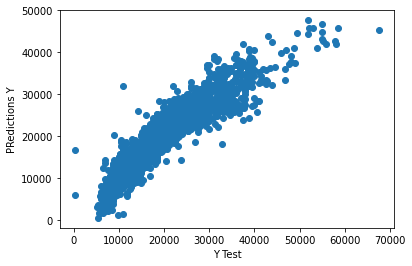

In [30]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('PRedictions Y')

In [63]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [64]:
print("Lrcoeff: ",lr.coef_)

Lrcoeff:  [-1.35503889e+03  2.32263197e+03  2.70444404e+02 -1.66539584e+01
 -1.50423437e+02  9.22949527e+01 -2.98585151e+02 -2.03738343e+03
  1.19596369e+01  5.09528964e+01 -2.63847627e+01 -2.62575520e+01
  1.42033598e+02 -7.44573453e+01  1.09181247e+02 -3.82041125e+14
 -1.61457411e+01  1.08881028e+02  6.79565740e+01  1.10292815e+02
  5.49125824e+02  1.08437717e+02  1.10869612e+02  5.27199052e+01
 -3.19974556e+01  9.77418226e+01  2.76966003e+01 -1.22667051e+02
  5.82760037e+01  2.70724172e+00  9.17243462e+01 -5.88009705e+01
  1.65449070e+02  5.88168945e+01  2.12046875e+02  6.32500000e+01
 -5.54257812e+01  7.74667969e+01 -1.30117188e+02  7.26826172e+01
  1.65570312e+02 -1.22947266e+02 -5.40234375e+01  1.05332031e+02
 -4.27148438e+01 -3.11718750e+01  4.10937500e+00 -2.75296875e+02
  3.78369141e+01  3.01219238e+02  3.40136719e+01 -5.47812500e+01
  2.79335938e+01  1.09437500e+02 -4.94316406e+01 -5.04248047e+01
 -1.23955078e+02  3.97480469e+01 -3.65546875e+01  5.44011230e+01
 -4.34960938e+0

##Predicting Test Data

In [39]:
y_pred = lr.predict(X_test_scaled)
y_train_pred = lr.predict(X_train_scaled)#\\\\\\\\\\ßßßßßßßßßßßßßßßßßßßßßßßßßßßßßßßßßßß

In [41]:
print("Liner Regression MSE: ",mean_squared_error(y_test,y_pred))

Liner Regression MSE:  3.0560180369175183e+25


##Model Evaluation

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [67]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,8.881710e-01,-5.796764e+17
mae,1.727292e+03,7.999186e+10
mse,6.187217e+06,3.056018e+25
rmse,2.487412e+03,5.528126e+12


In [ ]:
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [ 6.40489738e+03 -1.27215782e+03  2.27866135e+03  2.65988744e+02
 -3.06420698e+01 -1.19604573e+02  1.06126053e+02 -2.65769057e+02
 -1.30819571e+03  1.07159110e+01  5.02761297e+01 -2.17779019e+01
 -4.87670006e+01  1.27816984e+02 -7.07883488e+01  1.03031043e+02
  5.44625392e+14 -9.64314152e+00  1.11066056e+02  6.46543839e+01
  1.03403552e+02  5.43291331e+02  1.16782145e+02  9.15934841e+01
  4.71019217e+01 -3.62419469e+01  1.15966603e+02  3.07989255e+01
 -1.18440675e+02  4.94817259e+01 -1.65212945e+01  7.99236614e+01
 -4.44470992e+01  1.72724609e+02  3.00703125e+01  2.09625000e+02
  6.30000000e+01 -6.12363281e+01  7.06093750e+01 -1.38265625e+02
  5.34882812e+01  1.85750000e+02 -1.20437500e+02 -5.03007812e+01
  9.27343750e+01 -5.15507812e+01 -1.43491211e+01  4.50781250e+00
 -2.63265625e+02  6.57636719e+01  2.95832031e+02  3.04218750e+01
 -7.13203125e+01  2.42109375e+01  1.05960938e+02 -5.72109375e+01
 -4.98750000e+01 -1.14171875e+02  1.95468750e+01 -2.61987305e+01
  3.81933

## Residuals
Plotting a histogram of the residuals and  to make sure it looks normally distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


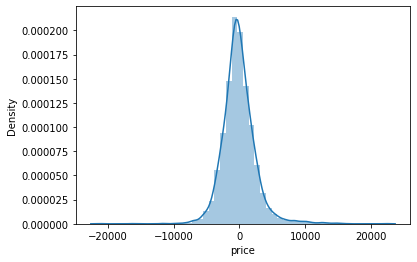

In [16]:
sns.distplot((y_test-predictions),bins=50);

## Let's see if we can interpret the coefficients at all to get an idea

In [ ]:
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Unnamed: 0,6.404897e+03
km,-1.272158e+03
hp,2.278661e+03
Nr. of Doors,2.659887e+02
Nr. of Seats,-3.064207e+01
...,...
Upholstery_Color_Orange,3.807106e+12
Upholstery_Color_Other,9.738573e+13
Upholstery_Color_Red,1.076474e+13
Upholstery_Color_White,1.006994e+13


##Cross Validate
We do cross-validation to check whether the one-time scores we receive are consistent or not

cross validation is only applied to the train set.

In [17]:
from sklearn.model_selection import cross_validate, cross_val_score

In [ ]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [ ]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.112659,0.002829,8.808776e-01,-1.730759e+03,-6.583445e+06,-2.565822e+03
2,0.145644,0.007921,-6.595616e+22,-7.138401e+13,-3.786155e+30,-1.945804e+15
3,0.157012,0.002819,-4.067444e+23,-1.730324e+14,-2.224558e+31,-4.716522e+15
4,0.140909,0.002769,-3.758573e+24,-5.253575e+14,-2.137774e+32,-1.462113e+16
5,0.155560,0.002760,-2.070784e+24,-3.989225e+14,-1.084268e+32,-1.041282e+16


In [ ]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                            -1.260411e+24
test_neg_mean_absolute_error       -2.337393e+14
test_neg_mean_squared_error        -6.964719e+31
test_neg_root_mean_squared_error   -6.339255e+15
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,8.922155e-01,-1.178043e+18
mae,1.672260e+03,1.140338e+11
mse,5.963444e+06,6.210570e+25
rmse,2.442016e+03,7.880717e+12


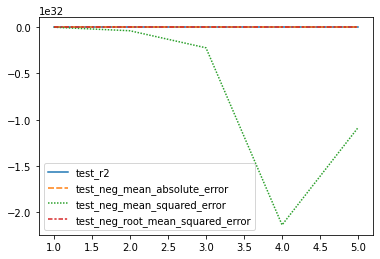

In [ ]:
sns.lineplot(data = scores.iloc[:,2:]);

# Regularization

# Ridge

###Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting and overfiting

In [43]:
from sklearn.linear_model import Ridge

In [57]:
ridge = Ridge( random_state=42, max_iter= 200000)
#ridge_model = Ridge(alpha=1, random_state=42)

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
alphas= np.logspace(-4,-0.5,30)

In [47]:
tuned_parameters= [{'alphas':alphas}]
n_folds=5

In [62]:
clf=GridSearchCV(estimator=ridge, param_grid=tuned_parameters, cv=n_folds, scoring="neg_mean_squared_error", refit=True)


In [60]:
clf.fit(X_train_scaled, y_train)

ValueError: ignored

In [ ]:
scores=clf.cv_results_["mean_test_score"]
scores_std=clf.cv_results_["std_test_score"]

In [ ]:
print("Ridge Coeff: ", clf.best_estimator_.coef)

In [ ]:
ridge=clf.best_estimator_
print("Ridge best Estimator: ", ridge)

In [ ]:
y_pred=clf.predict(X_test_scaled)
mse=mean_squared_error(y_test, y_pred)

In [ ]:
#y_pred = ridge_model.predict(X_test_scaled)
#y_train_pred = ridge_model.predict(X_train_scaled)

In [ ]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

In [ ]:
pd.concat([ls, rs], axis=1)

For Ridge Regression CV with alpha : 1

In [ ]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(scores, index = range(1, 6))

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

In [ ]:
sns.lineplot(data = scores.iloc[:,2:])

In [ ]:
ridge_model.coef_

In [ ]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [ ]:
pd.concat([lm_df,rm_df], axis = 1)

Choosing best alpha value with Cross-Validation

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

In [ ]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [ ]:
ridge_cv_model.fit(X_train_scaled, y_train)

In [ ]:
ridge_cv_model.alpha_

In [ ]:
ridge_cv_model.best_score_

In [ ]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [ ]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

In [ ]:
pd.concat([ls, rs, rcs], axis = 1)

In [ ]:
ridge_cv_model.coef_

In [ ]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.02"])

In [ ]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

# Lasso

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [ ]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

In [ ]:
pd.concat([ls, rs, rcs, lss], axis = 1)

For Lasso CV with Default Alpha : 1

In [ ]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(scores, index = range(1, 6))

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

In [ ]:
sns.lineplot(data = scores.iloc[:,2:])

In [ ]:
lasso_model.coef_

In [ ]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

Choosing best alpha value with Cross-Validation

In [ ]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [ ]:
lasso_cv_model.fit(X_train_scaled, y_train)

In [ ]:
lasso_cv_model.alpha_

In [ ]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

In [ ]:
alpha_space[::-1]

In [ ]:
#mse score for CV
lasso_cv_model.mse_path_[-1].mean()

In [ ]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [ ]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

In [ ]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

In [ ]:
lasso_cv_model.coef_

In [ ]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

## Elastic-Net 

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [ ]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

In [ ]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [ ]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

In [ ]:
elastic_model.coef_

In [ ]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

Choosing best alpha and l1_ratio values with Cross-Validation

In [ ]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [ ]:
elastic_cv_model.fit(X_train_scaled, y_train)

In [ ]:
elastic_cv_model.alpha_

In [ ]:
elastic_cv_model.l1_ratio_

In [ ]:
#mse score for CV
elastic_cv_model.mse_path_[5][-1].mean()

In [ ]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [ ]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

In [ ]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

In [ ]:
elastic_cv_model.coef_

In [ ]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

##Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [ ]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

In [ ]:
grid_model.best_params_

In [ ]:
pd.DataFrame(grid_model.cv_results_)

In [ ]:
grid_model.best_index_

In [ ]:
grid_model.best_score_

##Using Best Hyper Parameters From GridSearch

In [ ]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

##Final Model

In [ ]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [ ]:
final_model = Lasso(alpha=0.01) #lasso_cv_model

In [ ]:
final_model.fit(X_scaled, y)

##Feature importances with Ridge

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

##Feature importances with Lasso

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()